## Reexploring the butenedial_ammonia_droplets.csv dataset with new functions to see experimental landscape

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *
from src.d00_utils.processing_utils import perform_bootstrap

In [3]:
compounds, water = load_compounds()
experiments = load_experiments(['bd_as_vial', 'bd_as_droplet'])
constants = load_constants()
paths = load_paths()
experiments

{'bd_as_vial': {'raw_data_file': '190918-butenedial-ammonia-droplets.csv',
  'composition': {'Butenedial': '0.75*0.07',
   'PEG-6': 0.2,
   'NH42SO4': '0.03*3'},
  'solution_name': None,
  'bad_idx': None,
  'idx_range': None,
  'trap_time': [0, 10],
  'other_query': 'comptype=="bd07hg20as03" and trapped<10 and p283>30000',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'comp',
   'experiment',
   'vial',
   'mz84_mz283',
   'mz85_mz283']},
 'bd_as_droplet': {'raw_data_file': '190918-butenedial-ammonia-droplets.csv',
  'composition': {'Butenedial': '0.75*0.07',
   'PEG-6': 0.2,
   'NH42SO4': '0.03*3'},
  'solution_comp': 'bd07hg20as03',
  'bad_idx': 100,
  'idx_range': None,
  'trap_time': None,
  'other_query': 'vial<10 and comptype=="bd07hg20as03"',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'comp',
   'experiment',
   'vial',
   'mz84_mz283',
   'mz85_mz283']}}

In [4]:
from src.d01_data.clean_ms_data import *

In [5]:
df_cleaned = filter_and_clean_data(ms_file_name=paths['raw_data'], experiment_parameters=experiments)
df_cleaned.head()

,mins,solution_name,experiment,vial,mz84_mz283,mz85_mz283
8,3.0,bd07hg20as03_002,bd_as_vial,1072.0,0.040180,0.033534
9,3.0,bd07hg20as03_002,bd_as_vial,1082.0,0.035870,0.044183
14,4.0,bd07hg20as03_006,bd_as_vial,1000.0,0.021963,0.016611
17,7.0,bd07hg20as03_007,bd_as_vial,61.0,0.002801,0.015251
19,4.0,bd07hg20as03_008,bd_as_vial,145.0,0.004552,0.011642


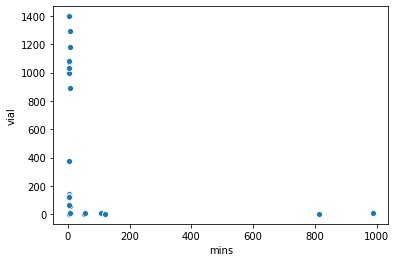

In [6]:
import seaborn as sns
sns.scatterplot(df_cleaned['mins'], df_cleaned.vial)

In [7]:
df_cleaned['hrs'] = (df_cleaned.mins + df_cleaned.vial) / 60
df_cleaned.hrs.head()

8     17.916667
9     18.083333
14    16.733333
17     1.133333
19     2.483333
Name: hrs, dtype: float64

In [8]:
df_cleaned.drop(['vial','mins'], axis=1).head()

,solution_name,experiment,mz84_mz283,mz85_mz283,hrs
8,bd07hg20as03_002,bd_as_vial,0.040180,0.033534,17.916667
9,bd07hg20as03_002,bd_as_vial,0.035870,0.044183,18.083333
14,bd07hg20as03_006,bd_as_vial,0.021963,0.016611,16.733333
17,bd07hg20as03_007,bd_as_vial,0.002801,0.015251,1.133333
19,bd07hg20as03_008,bd_as_vial,0.004552,0.011642,2.483333


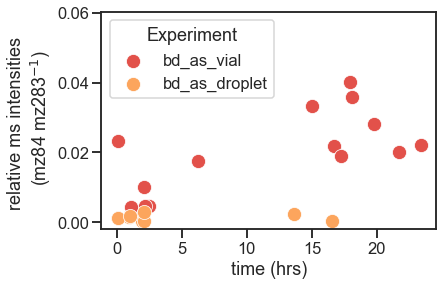

In [9]:
from src.d05_reporting.plot_ms_data import plot_ms_data

plot_ms_data(df_cleaned, experiment_names=['bd_as_vial', 'bd_as_droplet'], t_col_name='hrs', y_col_name='mz84_mz283', analyte='Pyrrolinone')

In [218]:
experiments_nh3g = load_experiments(['bd_nh3g'])

df_nh3g_cleaned = filter_and_clean_data(ms_file_name='190924-butenedial-nh3g-droplets.csv', experiment_parameters=experiments_nh3g)

In [11]:
df_nh3g_cleaned.head()

,mins,solution,nominal_nh3_molarity,mz84_mz283,mz85_mz283,mz149_mz283
8,3,butenedial-peg6-181016,0.00,0.001706,0.005410,0.000648
9,3,butenedial-peg6-181016,1.45,0.027495,0.001060,0.009438
10,3,butenedial-peg6-181016,0.00,0.003821,0.007328,0.000598
11,4,butenedial-peg6-181016,0.00,0.000974,0.006895,0.001039
12,18,butenedial-peg6-181016,1.45,0.022977,0.000669,0.022730


In [219]:
df_nh3g_cleaned.nominal_nh3_molarity = df_nh3g_cleaned.nominal_nh3_molarity * 10000
df_nh3g_cleaned.nominal_nh3_molarity = df_nh3g_cleaned.nominal_nh3_molarity.astype(int)
df_nh3g_cleaned['experiment'] = 'bd_nh3g_' + df_nh3g_cleaned.nominal_nh3_molarity.astype(str).str.replace('.','')
experiment_list = list(df_nh3g_cleaned.experiment.unique())
experiment_list

['bd_nh3g_0', 'bd_nh3g_14500', 'bd_nh3g_1450', 'bd_nh3g_145', 'bd_nh3g_28']

In [220]:
df_nh3g_cleaned.nominal_nh3_molarity.unique()

array([    0, 14500,  1450,   145,    28], dtype=int64)

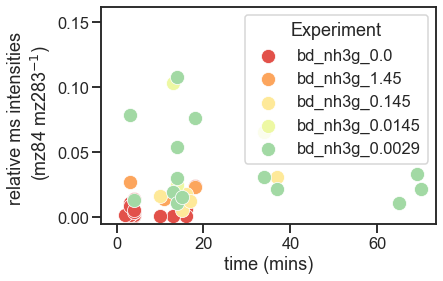

In [14]:
plot_ms_data(df_nh3g_cleaned, experiment_names=experiment_list, t_col_name='mins', y_col_name='mz84_mz283', analyte='Pyrrolinone')

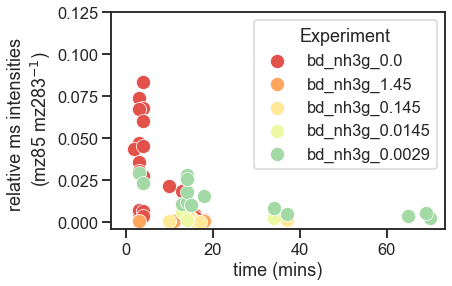

In [15]:
plot_ms_data(df_nh3g_cleaned, experiment_names=experiment_list, t_col_name='mins', y_col_name='mz85_mz283', analyte='Butenedial')

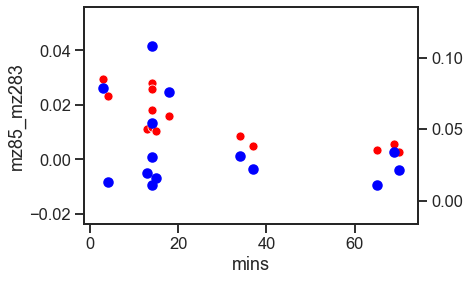

In [16]:
df_nh3g_cleaned_0029 = df_nh3g_cleaned[df_nh3g_cleaned.experiment == 'bd_nh3g_0.0029']

ax = sns.scatterplot(df_nh3g_cleaned_0029['mins'], df_nh3g_cleaned_0029['mz85_mz283'], color='red')
ax2 = ax.twinx()
ax2.scatter(df_nh3g_cleaned_0029['mins'], df_nh3g_cleaned_0029['mz84_mz283'], color='blue')

this particular experiment could be worth exploring. need to develop a code that clusters data together and gets their means and stds.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print(labels)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [30]:
mins = df_nh3g_cleaned_0029[['mins']].copy()
labels = cluster.KMeans(n_clusters=4).fit_predict(mins)
labels

array([0, 2, 1, 2, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1])

In [34]:
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = np.array([palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels])
print(colors)

[[0.29803922 0.44705882 0.69019608]
 [0.33333333 0.65882353 0.40784314]
 [0.86666667 0.51764706 0.32156863]
 [0.33333333 0.65882353 0.40784314]
 [0.29803922 0.44705882 0.69019608]
 [0.86666667 0.51764706 0.32156863]
 [0.29803922 0.44705882 0.69019608]
 [0.29803922 0.44705882 0.69019608]
 [0.29803922 0.44705882 0.69019608]
 [0.76862745 0.30588235 0.32156863]
 [0.76862745 0.30588235 0.32156863]
 [0.29803922 0.44705882 0.69019608]
 [0.29803922 0.44705882 0.69019608]
 [0.86666667 0.51764706 0.32156863]]


In [223]:
xs = np.array(df_nh3g_cleaned_0029['mins'])
xs

ys = np.array(df_nh3g_cleaned_0029['mz84_mz283'])
ys

array([0.07612951, 0.02188433, 0.0216397 , 0.03092224, 0.01931339,
       0.03360746, 0.0110794 , 0.03031024, 0.05419462, 0.07874781,
       0.01322171, 0.01548869, 0.10786207, 0.01095998])

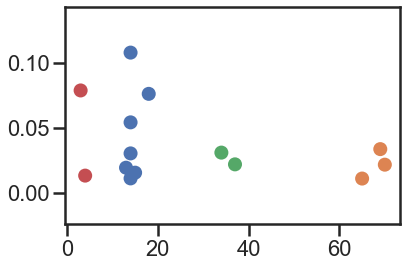

In [44]:
plt.scatter(xs,ys, c=colors)

create code to take clusters and then turn them into averages and stds

In [77]:
df_nh3g_cleaned_0029 = df_nh3g_cleaned_0029.assign(clusters=labels)
df_test = df_nh3g_cleaned_0029.groupby('clusters', as_index=False)['mins', 'mz84_mz283', 'mz85_mz283'].mean()
df_test_std = df_nh3g_cleaned_0029.groupby('clusters', as_index=False)['mins', 'mz84_mz283', 'mz85_mz283'].std()
df_comb = pd.merge(df_test, df_test_std, on=None, suffixes=('_mean','_std'), left_index=True, right_index=True, how='outer')
df_comb = df_comb.drop(columns=['clusters_mean', 'clusters_std'])
df_comb

,mins_mean,mz84_mz283_mean,mz85_mz283_mean,mins_std,mz84_mz283_std,mz85_mz283_std
0,14.571429,0.044911,0.017320,1.618347,0.036291,0.007111
1,68.000000,0.022069,0.003820,2.645751,0.011330,0.001489
2,35.500000,0.026403,0.006648,2.121320,0.006391,0.002800
3,3.500000,0.045985,0.026417,0.707107,0.046334,0.004438


<ErrorbarContainer object of 3 artists>

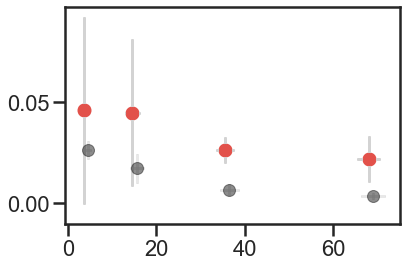

In [91]:
plt.scatter(df_test.mins, df_test.mz84_mz283)
plt.errorbar(df_comb.mins_mean, df_comb.mz84_mz283_mean, yerr=df_comb.mz84_mz283_std, xerr=df_comb.mins_std, fmt='o',
             ecolor='lightgray', capsize=1)
plt.errorbar(df_comb.mins_mean + 1, df_comb.mz85_mz283_mean, yerr=df_comb.mz85_mz283_std, xerr=df_comb.mins_std, fmt='o',
             color='k', alpha=0.5, ecolor='lightgray', capsize=1)
# plt.scatter(df_test.mins, df_test.mz85_mz283)

build unifying function

In [92]:
def add_clusters_to_dataframe(df, col_to_cluster, N_clusters):
    """"""
    data = df[[col_to_cluster]].copy()
    clusters = cluster.KMeans(N_clusters).fit_predict(data)
    df_with_clusters = df.assign(clusters=clusters)
    
    return df_with_clusters

In [106]:
def create_clustered_statistics_dataframe(df, col_to_cluster, cols_to_keep, N_clusters=4):
    df_with_clusters = add_clusters_to_dataframe(df=df, col_to_cluster=col_to_cluster, N_clusters=N_clusters)
    
    df_means = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].mean()
    df_ses = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].sem()
    df_combined = pd.merge(df_means, df_ses, on=None, 
                           suffixes=('_mean','_se'), left_index=True, right_index=True, how='outer')
    df_combined = df_combined.drop(columns=['clusters_mean', 'clusters_se'])
    
    return df_combined

In [107]:
df_0029_clustered = create_clustered_statistics_dataframe(df=df_nh3g_cleaned_0029, 
                                                          col_to_cluster='mins', 
                                                          cols_to_keep=['mins', 'mz84_mz283', 'mz85_mz283'],
                                                          N_clusters=4)
df_0029_clustered

,mins_mean,mz84_mz283_mean,mz85_mz283_mean,mins_se,mz84_mz283_se,mz85_mz283_se
0,14.571429,0.044911,0.017320,0.611678,0.013717,0.002688
1,68.000000,0.022069,0.003820,1.527525,0.006541,0.000860
2,35.500000,0.026403,0.006648,1.500000,0.004519,0.001980
3,3.500000,0.045985,0.026417,0.500000,0.032763,0.003138


try looping over experiments

In [122]:
from math import floor

def create_clustered_statistics_dataframe(df, experiments, col_to_cluster, cols_to_keep):
    
    df_clustered_stats = pd.DataFrame()
    for experiment_name, experiment_defs in experiments.items():
        df_exp = df[df.experiment == experiment_name]
        print(df_exp)
        print(experiment_name)
        
    
        N_clusters = floor(len(df_exp) / 4)
        print(N_clusters)
        df_with_clusters = add_clusters_to_dataframe(df=df_exp, col_to_cluster=col_to_cluster, N_clusters=N_clusters)

        df_means = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].mean()
        df_ses = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].sem()
        df_combined = pd.merge(df_means, df_ses, on=None, 
                               suffixes=('_mean','_se'), left_index=True, right_index=True, how='outer')
        df_combined = df_combined.drop(columns=['clusters_mean', 'clusters_se'])
        
        df_clustered_stats.append(df_combined)
    
    return df_clustered_stats

In [124]:
experiments = load_experiments(['bd_nh3g'])
df_0029_clustered = create_clustered_statistics_dataframe(df=df_nh3g_cleaned, 
                                                          experiments=experiments,
                                                          col_to_cluster='mins', 
                                                          cols_to_keep=['mins', 'mz84_mz283', 'mz85_mz283'])

Empty DataFrame
Columns: [mins, solution, nominal_nh3_molarity, mz84_mz283, mz85_mz283, mz149_mz283, experiment]
Index: []
bd_nh3g
0


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [192]:
import math
def create_clustered_statistics_dataframe(df_cleaned, col_to_cluster, y_cols_to_keep):
    """"""
    
    cols_to_keep = y_cols_to_keep
    cols_to_keep.append(col_to_cluster)
    
    df_clustered_stats = pd.DataFrame()
    experiment_names = list(df_cleaned.experiment.unique())
    for experiment_name in experiment_names:
        df_exp = df_cleaned[df_cleaned.experiment == experiment_name]
        
        if len(df_exp) >= 4:
            N_clusters = math.floor(len(df_exp) / 3)
        elif len(df_exp) < 4:
            N_clusters = len(df_exp)
        df_with_clusters = add_clusters_to_dataframe(df=df_exp,
                                                     col_to_cluster=col_to_cluster,
                                                     N_clusters=N_clusters)

        df_means = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].mean()
        df_ses = df_with_clusters.groupby('clusters', as_index=False)[cols_to_keep].sem()
        df_combined = pd.merge(df_means, df_ses, on=None,
                               suffixes=('_mean', '_se'), left_index=True, right_index=True, how='outer')
        df_combined = df_combined.drop(columns=['clusters_mean', 'clusters_se'])
        df_combined = df_combined.assign(experiment=experiment_name)
        
        df_clustered_stats = df_clustered_stats.append(df_combined)

    return df_clustered_stats

In [193]:
df_clustered = create_clustered_statistics_dataframe(df_nh3g_cleaned, 
                                                     col_to_cluster='mins', 
                                                     y_cols_to_keep=['mz84_mz283', 'mz85_mz283'])

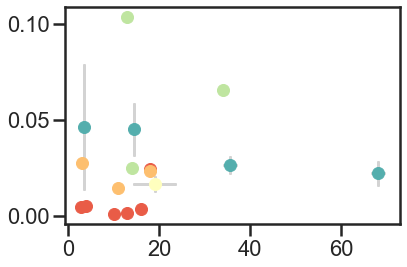

In [236]:
experiment_list = list(df_clustered.experiment.unique())

colors = sns.color_palette("Spectral", 5)
count = 0
for experiment_name in experiment_list:
    df_to_plot = df_clustered[df_clustered.experiment == experiment_name]
    plt.errorbar(df_to_plot.mins_mean, df_to_plot.mz84_mz283_mean, 
                 yerr=df_to_plot.mz84_mz283_se, xerr=df_to_plot.mins_se, fmt='o', c=colors[count],
                 ecolor='lightgray', capsize=1, label=experiment_name)
    count += 1

In [228]:
df_nh3g_cleaned[df_nh3g_cleaned.solution == 'butenedial-peg6-181016']

,mins,solution,nominal_nh3_molarity,mz84_mz283,mz85_mz283,mz149_mz283,experiment
8,3,butenedial-peg6-181016,0,0.001706,0.005410,0.000648,bd_nh3g_0
9,3,butenedial-peg6-181016,14500,0.027495,0.001060,0.009438,bd_nh3g_14500
10,3,butenedial-peg6-181016,0,0.003821,0.007328,0.000598,bd_nh3g_0
11,4,butenedial-peg6-181016,0,0.000974,0.006895,0.001039,bd_nh3g_0
12,18,butenedial-peg6-181016,14500,0.022977,0.000669,0.022730,bd_nh3g_14500
13,16,butenedial-peg6-181016,0,0.006020,0.004281,0.001163,bd_nh3g_0
14,11,butenedial-peg6-181016,14500,0.014203,0.000593,0.015460,bd_nh3g_14500
15,4,butenedial-peg6-181016,0,0.001900,0.003839,0.001102,bd_nh3g_0
16,15,butenedial-peg6-181016,1450,0.005532,0.002269,0.000357,bd_nh3g_1450
17,18,butenedial-peg6-181016,0,0.024033,0.001254,0.011797,bd_nh3g_0
